### Set up

In [2]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from wordcloud import WordCloud
import collections 
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cluster import KMeans
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
import numpy as np
plt.style.use('ggplot')

/Users/pei-ciwu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load Data

In [3]:
dtm_lsa = np.load("dtm_lsa_2gram.dat")
dtm_lsa_test = np.load("dtm_lsa_test_2gram.dat")
y_train = pickle.load(open("y_train_2gram.txt","rb"))
y_test = pickle.load(open("y_test_2gram.txt", "rb"))

### Naive Baysian
suitable for discrete model, especially in text mining and faster. But it usually requires integer counts. (In some cases, tfidf also works)



Reference

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [4]:
#Naive Baysian
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [5]:
# get y_predict_nb for X_test_tf
y_predict_nb = nb.fit(dtm_lsa, y_train).predict(dtm_lsa_test)

In [6]:
# get the time to fit and predict the model (for reference speed)
%time nb.fit(dtm_lsa, y_train).predict(dtm_lsa_test)

CPU times: user 310 ms, sys: 114 ms, total: 424 ms
Wall time: 424 ms


array([0, 1, 0, ..., 1, 1, 0])

In [7]:
# calculate accuracy rate
from sklearn import metrics
metrics.accuracy_score(y_test, y_predict_nb)

0.72813509850932967

In [8]:
# get the confusion matrix
metrics.confusion_matrix(y_test, y_predict_nb)

array([[14905,  3416],
       [ 9624, 20020]])

### Logistic
Usually takes longer time than NB, but more flexible

Reference
> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [9]:
# import logistic regression 
from sklearn.linear_model import LogisticRegression
import time
start = time.time()


# Tuning Parameters
C_range = list(range(1,201,1))
y_matrix = []
for i in C_range:
    lr = LogisticRegression(max_iter=1000, tol = 0.001, C=i)
    y_predict_lr = lr.fit(dtm_lsa, y_train).predict(dtm_lsa_test)
    accuracy_rate = metrics.accuracy_score(y_test, y_predict_lr)
    y_matrix.append([accuracy_rate, i])

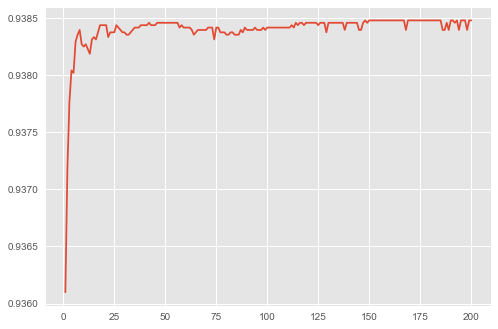

In [10]:
# Accuracy by tuning parameters
accuracy = pd.DataFrame(y_matrix, columns= ["Accuracy", "C"])
plt.plot(C_range, accuracy.Accuracy)
plt.show()
c_tune = np.where(accuracy.Accuracy == max(accuracy.Accuracy))
# C = 199 with max accuracy 

In [13]:
# get y_predict_lr
lr = LogisticRegression(max_iter=10000, tol = 0.000001, C=199)
y_predict_lr = lr.fit(dtm_lsa, y_train).predict(dtm_lsa_test)

In [14]:
# get the time to fit and predict the model (for reference speed)
# %time lr.fit(dtm_lsa, y_train).predict(dtm_lsa_test)
print "Time : {}".format(time.time()-start)

Time : 1618.33188605


In [15]:
# calculate accuracy rate
metrics.accuracy_score(y_test, y_predict_lr)

0.93845512352757221

In [16]:
# get the confusion matrix
metrics.confusion_matrix(y_test, y_predict_lr)

array([[16705,  1616],
       [ 1336, 28308]])